In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import scienceplots

In [16]:
# science plots
plt.style.use(['science','ieee'])

In [17]:
# Estimate the following expected value: E(W_3^2 + sin(W_3) + 2e^{W_3})
# Where W_t is a standard Wiener process, that is the drift parameter is zero and the Variance parameter sigma^2 = 1.

# The expected value of a function of a Wiener process is given by the following formula:
# E(f(W_t)) = \int_{-\infty}^{\infty} f(x) * \frac{1}{\sqrt{2\pi t}} * e^{-\frac{x^2}{2t}} dx
# Where t is the time at which we are evaluating the function f, and x is the value of the Wiener process at time t.

# Number of simulations, samples and time steps
N = 20000
n = 20000
t = 3

# Generate N samples of the Wiener process at time t
W = np.random.normal(0, np.sqrt(t), N)
 
# Calculate the expected value of the function f(W_t) = W_t^2 + sin(W_t) + 2e^{W_t}
f = W**2 + np.sin(W) + 2*np.exp(W)
E = np.mean(f)
print('The expected value of the function f(W_t) = W_t^2 + sin(W_t) + 2e^{W_t} is:', E)

The expected value of the function f(W_t) = W_t^2 + sin(W_t) + 2e^{W_t} is: 12.270215794549538


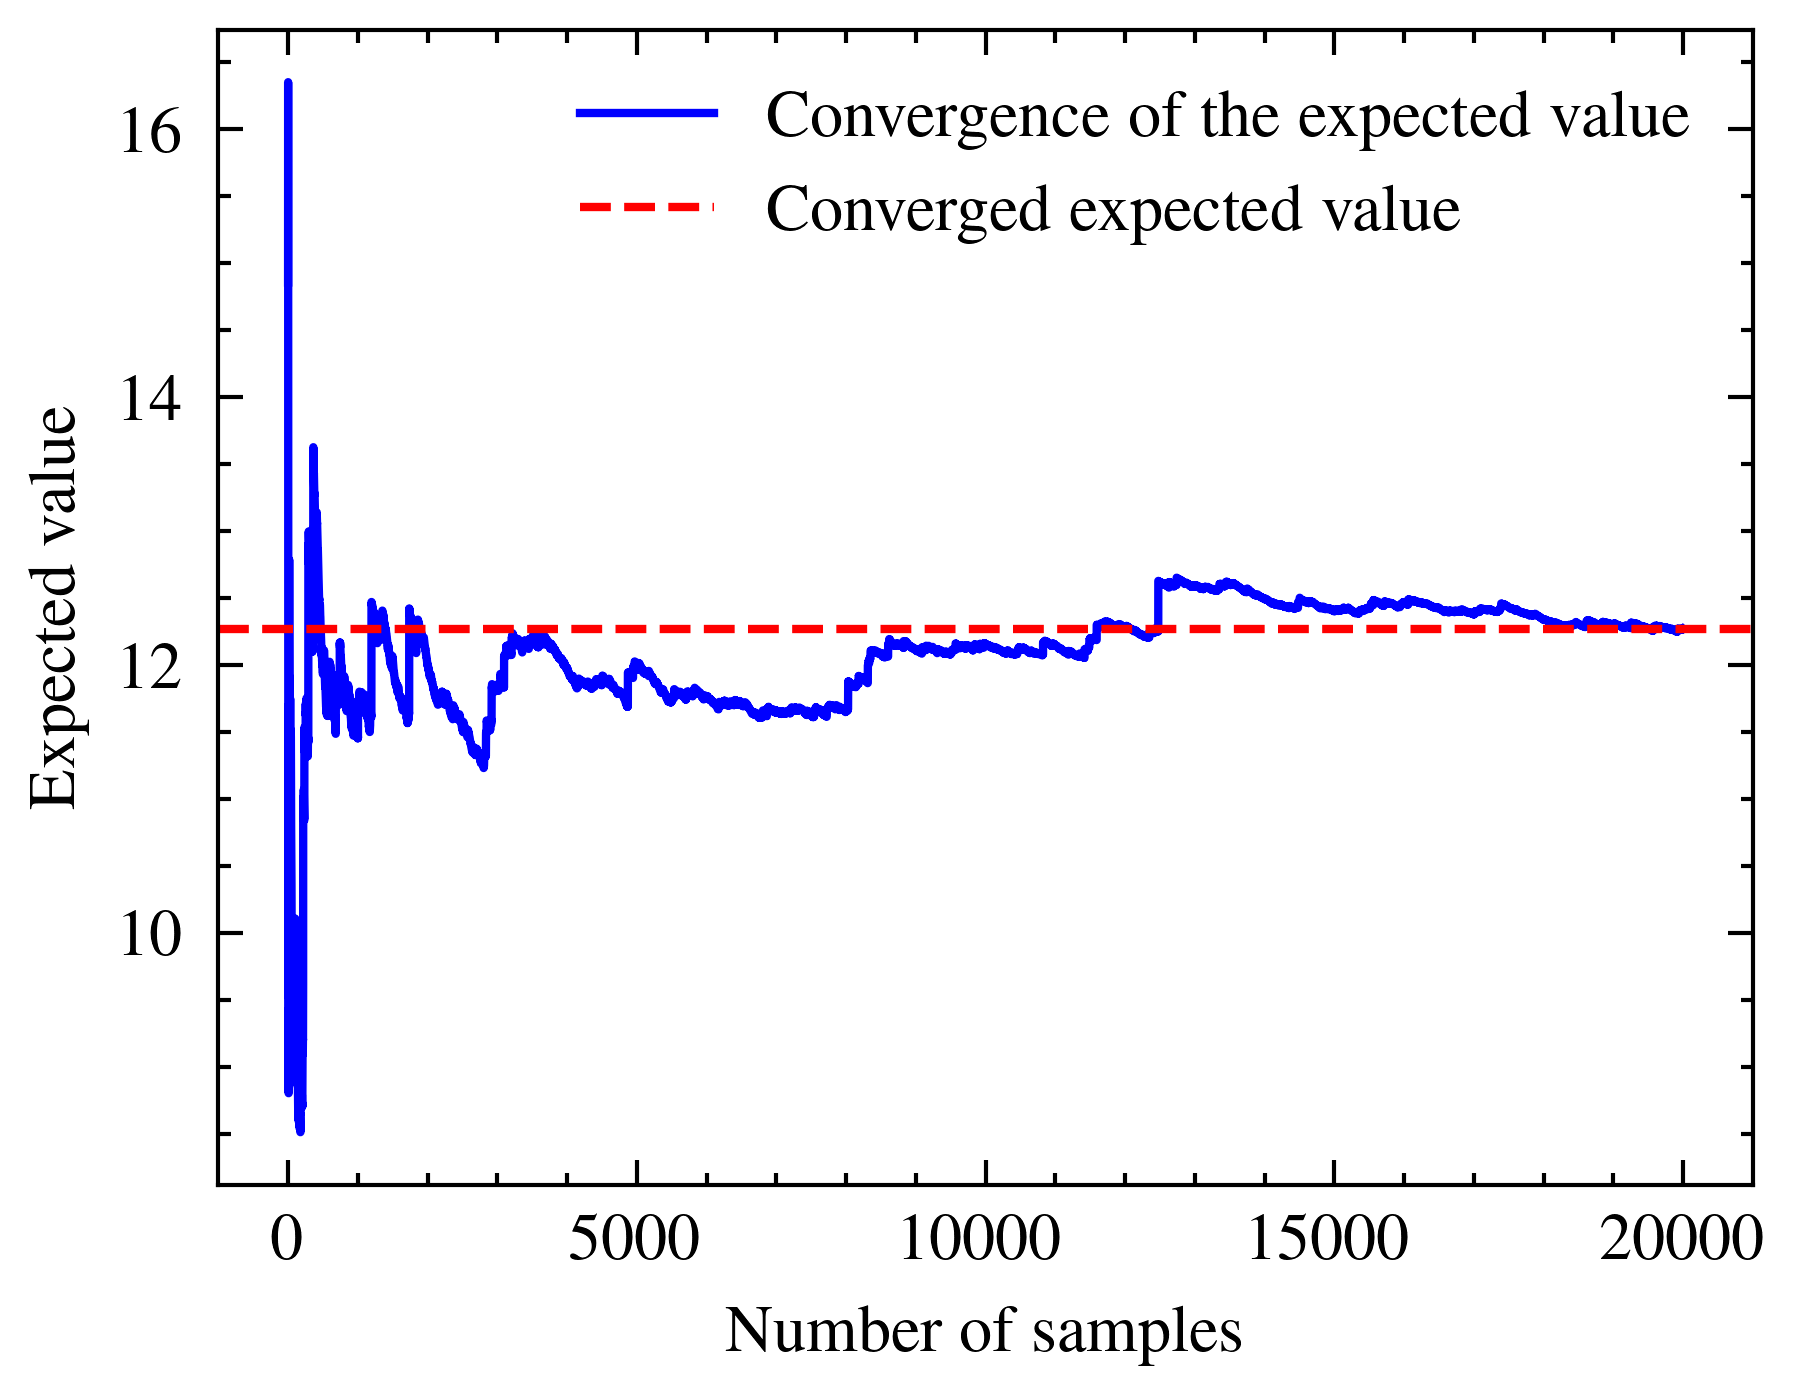

In [18]:
# Make a plot of the convergence of the expected value as the number of samples increases, with a red line indicating the true value of the expected value
E_n = np.zeros(n)
for i in range(n):
    E_n[i] = np.mean(f[:i+1])
plt.plot(E_n, label='Convergence of the expected value', color='b')
plt.axhline(y=E, color='r', linestyle='--', label='Converged expected value')
plt.xlabel('Number of samples')
plt.ylabel('Expected value')
plt.legend()
plt.show()

In [19]:
# Let S𝑡 be a Geometric Brownian Motion process: S_t = S_0e^{sigma W_t + (r-sigma^2/2)t} 
# where r = 0.05, sigma = 0.2, S_0 = 90, and W_t is a standard Wiener process. Estimate
# E[S_3].

# Number of Geometric Brownian Motion processes to simulate
N = 20000
 
# Parameters
r = 0.05
sigma = 0.2
S0 = 90
t = 3

# Generate N samples of the Wiener process at time t
W = np.random.normal(0, np.sqrt(t), N)

# Calculate the expected value of the Geometric Brownian Motion process at time t
S = S0*np.exp(sigma*W + (r - sigma**2/2)*t)
E = np.mean(S)
print('The expected value of the Geometric Brownian Motion process at time t is:', E)

# Real value of the expected value
E_real = S0*np.exp(r*t)
print('The real value of the expected value is:', E_real)


The expected value of the Geometric Brownian Motion process at time t is: 104.82057780700914
The real value of the expected value is: 104.56508184554548


In [20]:
# Evaluate the following expected value and probability:
# E[X_2^0.6] and P(X_2 > 2)
# Where the Ito's Processes evolve according to the following stochastic differential equation:
# dX_t = (1/4 + 1/3X_t)dt + 3/5dW_t, X_0 = 2
# and W_t is a standard Wiener process.

# Number of Ito's Processes to simulate
n = 100000
# Number of time steps
N = 100000
# Time step
dt = 2/N
# Time vector
t = np.linspace(0, 2, N+1)
# Wiener process
W = np.zeros(N+1)
# Ito's Process
X = np.zeros(N+1)
X[0] = 2
for i in range(N):
    dW = np.sqrt(dt)*np.random.normal(0, 1)
    X[i+1] = X[i] + (1/4 + 1/3*X[i])*dt + 3/5*dW
    W[i+1] = W[i] + dW

# Calculate the expected value of the function f(X_t) = X_t^0.6
f = X**0.6
E = np.mean(f)

# Calculate the probability P(X_2 > 2)
P = np.mean(X > 2)
print('The expected value of the function f(X_t) = X_t^0.6 is:', E)
print('The probability P(X_2 > 2) is:', P)


The expected value of the function f(X_t) = X_t^0.6 is: 1.763636229039186
The probability P(X_2 > 2) is: 0.8838058097095145


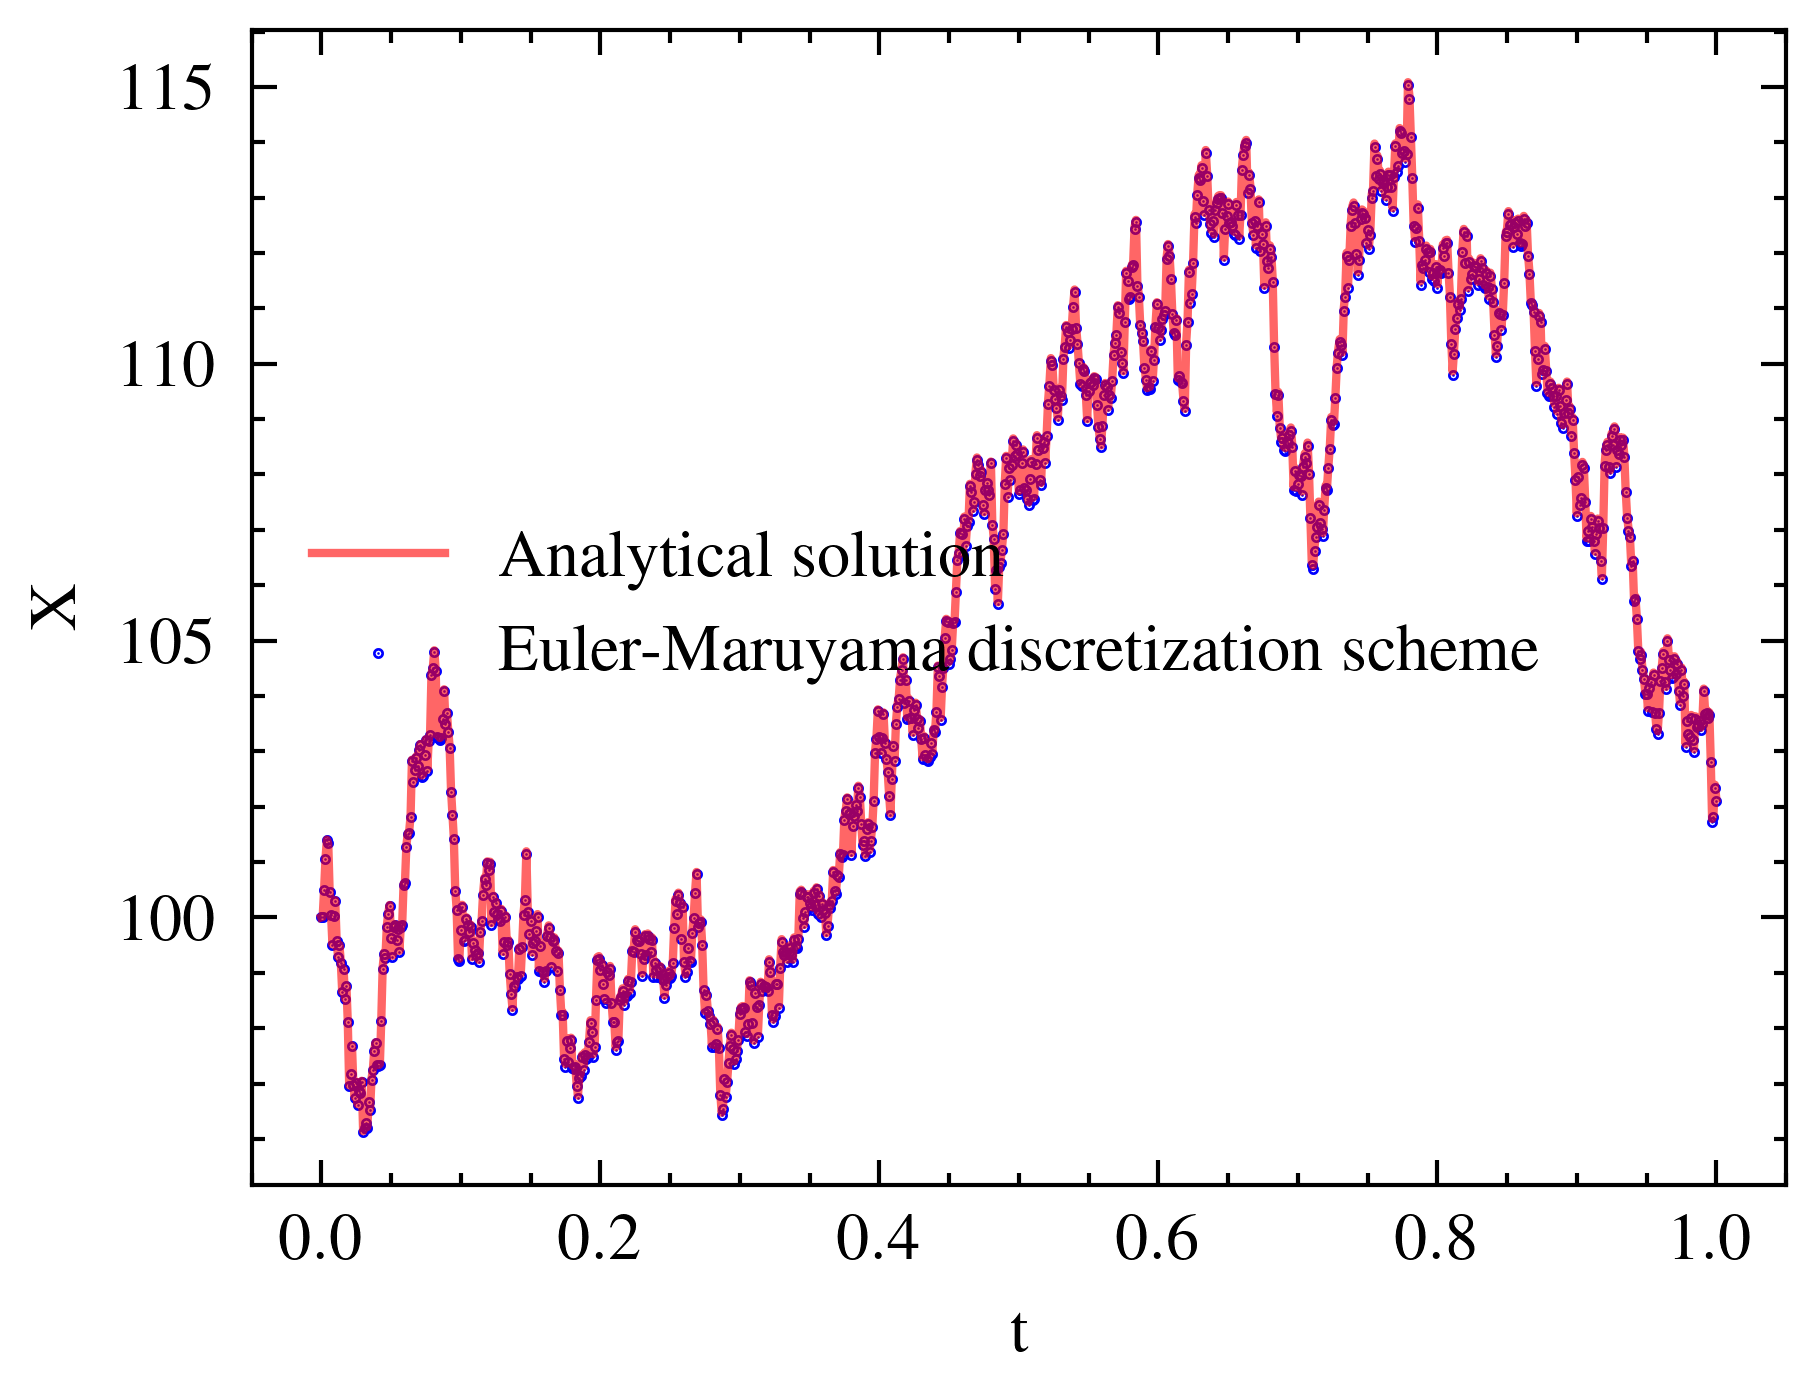

Difference:  42.96680570000292


In [21]:
# Consider the following SDE:
# dX_t = aX_tdt + bX_tdW_t, X_0 = 100, a = 0.07, b = 0.12

# a) Simulate this stochastic process using the discretization schemes of Euler-Maruyama
# b) Compare with the analytical solution.

# a) Simulate the stochastic process using the discretization schemes of Euler-Maruyama

# Parameters
a = 0.07
b = 0.12
X0 = 100
T = 1
N = 1000
dt = T/N
t = np.linspace(0, T, N+1)
W = np.zeros(N+1)
X = np.zeros(N+1)
X[0] = X0
# Euler-Maruyama discretization scheme
for i in range(N):
    dW = np.sqrt(dt)*np.random.normal(0, 1)
    X[i+1] = X[i] + a*X[i]*dt + b*X[i]*dW
    W[i+1] = W[i] + dW
    
# b) Compare with the analytical solution
# Analytical solution
X_analytical = X0*np.exp((a - b**2/2)*t + b*W)
# Plot the analytical solution and the Euler-Maruyama discretization scheme
# plot difference between the analytical solution and the Euler-Maruyama discretization scheme
plt.plot(t, X_analytical, label='Analytical solution', color='r', alpha=0.6)
plt.scatter(t, X, label='Euler-Maruyama discretization scheme', s=0.1, color='b', alpha=1)
plt.xlabel('t')
plt.ylabel('X')
plt.legend()
plt.show()

# print total difference between the analytical solution and the Euler-Maruyama discretization scheme
total_difference = np.sum(np.abs(X - X_analytical))
print('Difference: ', total_difference)